# Homework# 1

# Name: Dimitrios Mavrofridis
# NetID: 3377133

## Due date: Monday, January 17, 2022 at 3:30pm
## 10pts

### Task 1: Build a neural network to train and overfit the noisy $sin$ sample data

### Task 2: Build multiple neural networks and use different hyperparameters and activation functions in the process

### Task 3: Write a report explaining your findings related to different selections of hyperparameters. (Support your report with loss graphs, prediction fit to the test data).
1. learning rate.
2. activation functions.
3. depth of network (number of hidden layers).
3. width of network (number of neurons in layers).

In [1]:
import torch
torch.manual_seed(0)
from torch import nn
from torch import optim
from torch.utils.data import random_split

import numpy as np

import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load and prepare the data by spliting it into a training set and a validation set

## 1. load the data from data.csv

In [2]:
data = np.loadtxt('data.csv', delimiter=',')

## 2. suffle the dataset

In [3]:
tensor_data = torch.from_numpy(data).float()
idx = torch.randperm(tensor_data.shape[0])
tensor_data = tensor_data[idx].view(tensor_data.size())

## 3. split the dataset into training and validation

In [4]:
train_data, test_data = random_split(tensor_data, [150, 50])
train_data, validation_data = random_split(train_data, [100, 50])

In [5]:
train_x = tensor_data[train_data.indices].numpy()[:,:-1]
train_y = tensor_data[train_data.indices].numpy()[:,-1:]
validation_x = tensor_data[validation_data.indices].numpy()[:,:-1]
validation_y = tensor_data[validation_data.indices].numpy()[:,-1:]
test_x = tensor_data[test_data.indices].numpy()[:,:-1]
test_y = tensor_data[test_data.indices].numpy()[:,-1:]

## 4. plot each of the train and validation datasets

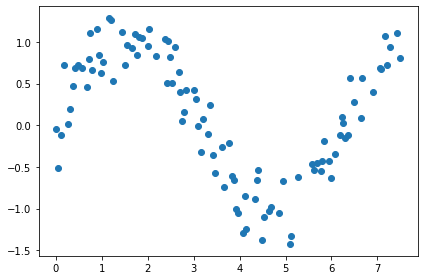

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(train_x, train_y)

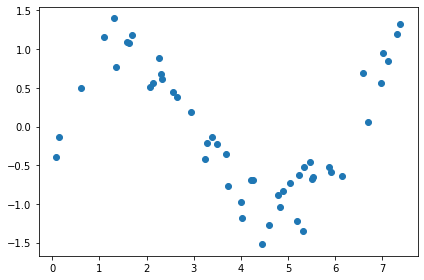

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(validation_x, validation_y)

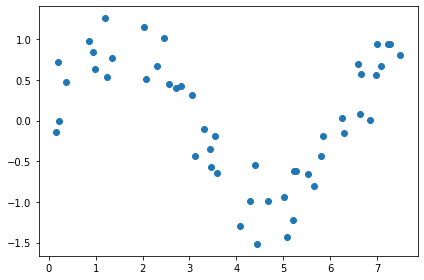

In [8]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(test_x, test_y)

## helper function to make predictions

In [9]:
def predict(trained_model, x):
    with torch.no_grad():
        logits = trained_model(x)
    return logits.numpy()

## convert numpy arrays to pytorch tensors

In [10]:
train_x = torch.from_numpy(np.array(train_x)).float()
train_y = torch.from_numpy(np.array(train_y)).float()

validation_x = torch.from_numpy(np.array(validation_x)).float()
validation_y = torch.from_numpy(np.array(validation_y)).float()

test_x = torch.from_numpy(np.array(test_x)).float()
test_y = torch.from_numpy(np.array(test_y)).float()

# Example Network

## set your hyperparameters and define model

In [11]:
number_of_epochs = 100
learning_rate = 1e-2

example_model = nn.Sequential(
    nn.Linear(1, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

optimizer = optim.SGD(example_model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [12]:
def train_model(model, optimizer, loss, number_of_epochs, learning_rate):
    train_losses_history = []
    validation_losses_history = []

    for epoch in range(number_of_epochs):
        train_losses = []

        # training steps
        # forward pass
        logits = model(train_x)

        # compute the objective function
        objective = loss(logits, train_y)

        # clean the gradients
        model.zero_grad()

        # computer the partial derivative of the gradients of the objective function wrt to the parameters
        objective.backward()

        # step in the opposite direction of the gradient
        optimizer.step()

        train_losses = objective.item()
        train_mean_loss = torch.tensor(train_losses).mean().item()
        train_losses_history.append(train_mean_loss)

        validation_losses = []

        # validation steps
        # forward pass
        with torch.no_grad():
            logits = model(validation_x)

        # compute the objective function
        objective = loss(logits, validation_y)

        validation_losses = objective.item()
        validation_mean_loss = torch.tensor(validation_losses).mean().item()

#         print(f"Epoch# {epoch + 1}, training loss {mean_loss}, validation loss {validation_mean_loss}")
        validation_losses_history.append(validation_mean_loss)
    return train_losses_history, validation_losses_history

In [13]:
train_loss, validation_loss = train_model(example_model, optimizer, loss, number_of_epochs, learning_rate)

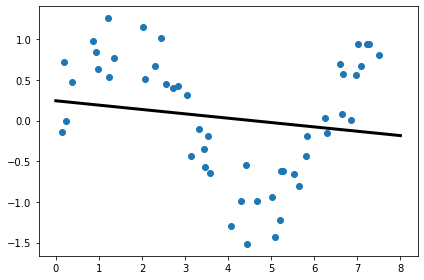

In [14]:
fig = plt.figure()
ax = plt.axes()
# x = x.numpy()
# y = y.numpy()
ax.scatter(test_x, test_y)
x1 = torch.tensor(np.linspace(0, 8.0, 200).reshape(-1,1)).float()
ax.plot(x1, predict(example_model, x1), "k", linewidth=3)

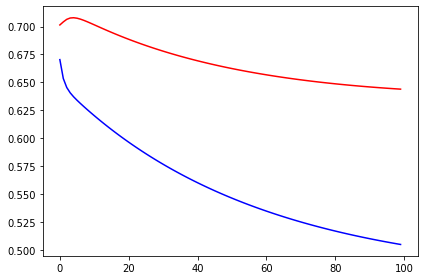

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.plot(train_loss, "b")
ax.plot(validation_loss, "r")

# Q0: Study the above example to understand the training and validation loop. You will be training a set of models to fit the loaded data.

# Q1 (3pts): The following two cells display an output of a model that is overfitting the data. Try to build a model that achieves the same goal. (hint: go for width and depth.)

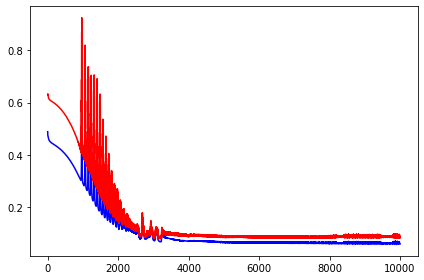

In [26]:
# Overfitting Model 0
number_of_epochs = 10000
learning_rate = 1e-2

complex_model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

optimizer = optim.SGD(complex_model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

train_loss, validation_loss = train_model(complex_model, optimizer, loss, number_of_epochs, learning_rate)
fig = plt.figure()
ax = plt.axes()
ax.plot(train_loss, "b")
ax.plot(validation_loss, "r")

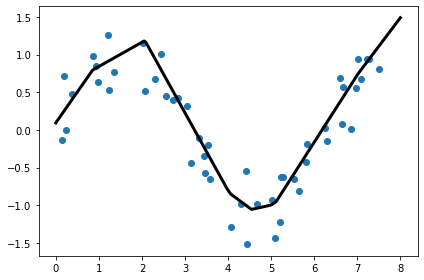

In [27]:
fig = plt.figure()
ax = plt.axes()
# x = x.numpy()
# y = y.numpy()
ax.scatter(test_x, test_y)
x1 = torch.tensor(np.linspace(0, 8.0, 200).reshape(-1,1)).float()
ax.plot(x1, predict(complex_model, x1), "k", linewidth=3)

# Q2 (4 pts): Duplicate the above two cells and experiment creating different networks, experiment with the depth and the width of networks, the learning rate, the number of epochs, and the activation function.

Some examples:
1. learning rate: 0.1, 0.01, 0.001 etc.
2. activation functions: tanh, sigmoid, relu etc.
3. depth of network: 2 hidden layers, 3 hidden layers, 4 hidden layers, etc.

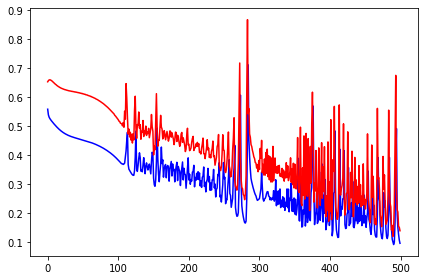

In [28]:
# Overfitting model 1
number_of_epochs = 500
learning_rate = 0.1

complex_model = nn.Sequential(
    nn.Linear(1, 25),
    nn.ReLU(),
    nn.Linear(25, 20),
    nn.ReLU(),
    nn.Linear(20, 15),
    nn.ReLU(),
    nn.Linear(15, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

optimizer = optim.SGD(complex_model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

train_loss, validation_loss = train_model(complex_model, optimizer, loss, number_of_epochs, learning_rate)
fig = plt.figure()
ax = plt.axes()
ax.plot(train_loss, "b")
ax.plot(validation_loss, "r")

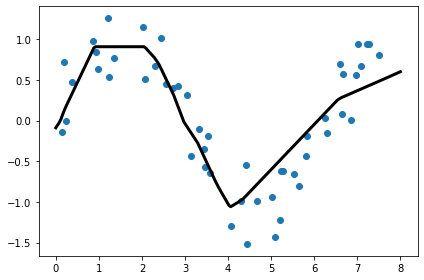

In [29]:
fig = plt.figure()
ax = plt.axes()
# x = x.numpy()
# y = y.numpy()
ax.scatter(test_x, test_y)
x1 = torch.tensor(np.linspace(0, 8.0, 200).reshape(-1,1)).float()
ax.plot(x1, predict(complex_model, x1), "k", linewidth=3)

# Q3 (3 pts): Use markdown and write a few paragraphs explaining your finding from the above experiments. Describe how do you interpret each network performance was affected by the hyperparameters and design. (Hint: Explain it as if you're presenting to a non-technical individual.)